In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
datasets = ['HotpotQA', 'TyDi QA']
colors = {
    "ContextCite-L (256 calls)": "#1f77b4",
    "ContextCite-L (128 calls)": "#1f77b4cc",
    "ContextCite-L (64 calls)": "#1f77b499",
    "ContextCite-L (32 calls)": "#1f77b466",
    "ContextCite (256 calls)": "#2ca02c",
    "ContextCite (128 calls)": "#2ca02ccc",
    "ContextCite (64 calls)": "#2ca02c99",
    "ContextCite (32 calls)": "#2ca02c66",
    "Average attention": "#ff7f0e",
    "Similarity": "#8c564b",
    "Gradient ℓ₁-norm": "#d62728",
    "Leave-one-out": "#9467bd"
}

In [3]:
contextcite_l_lds = {
    "ContextCite-L (256 calls)": [0.910596, 0.9078984],
    "ContextCite-L (128 calls)": [0.902216, 0.9032883],
    "ContextCite-L (64 calls)": [0.895799, 0.9001737],
    "ContextCite-L (32 calls)": [0.882541, 0.9000254],
}
contextcite_lds = {
    "ContextCite (256 calls)": [0.83, 0.80],
    "ContextCite (128 calls)": [0.82, 0.79],
    "ContextCite (64 calls)":  [0.80, 0.77],
    "ContextCite (32 calls)":  [0.76, 0.72],
}
other_methods_lds = {
    "Average attention": [0.61, 0.58],
    "Similarity": [0.33, 0.25],
    "Gradient ℓ₁-norm": [0.28, 0.25],
    "Leave-one-out": [0.75, 0.74],
}

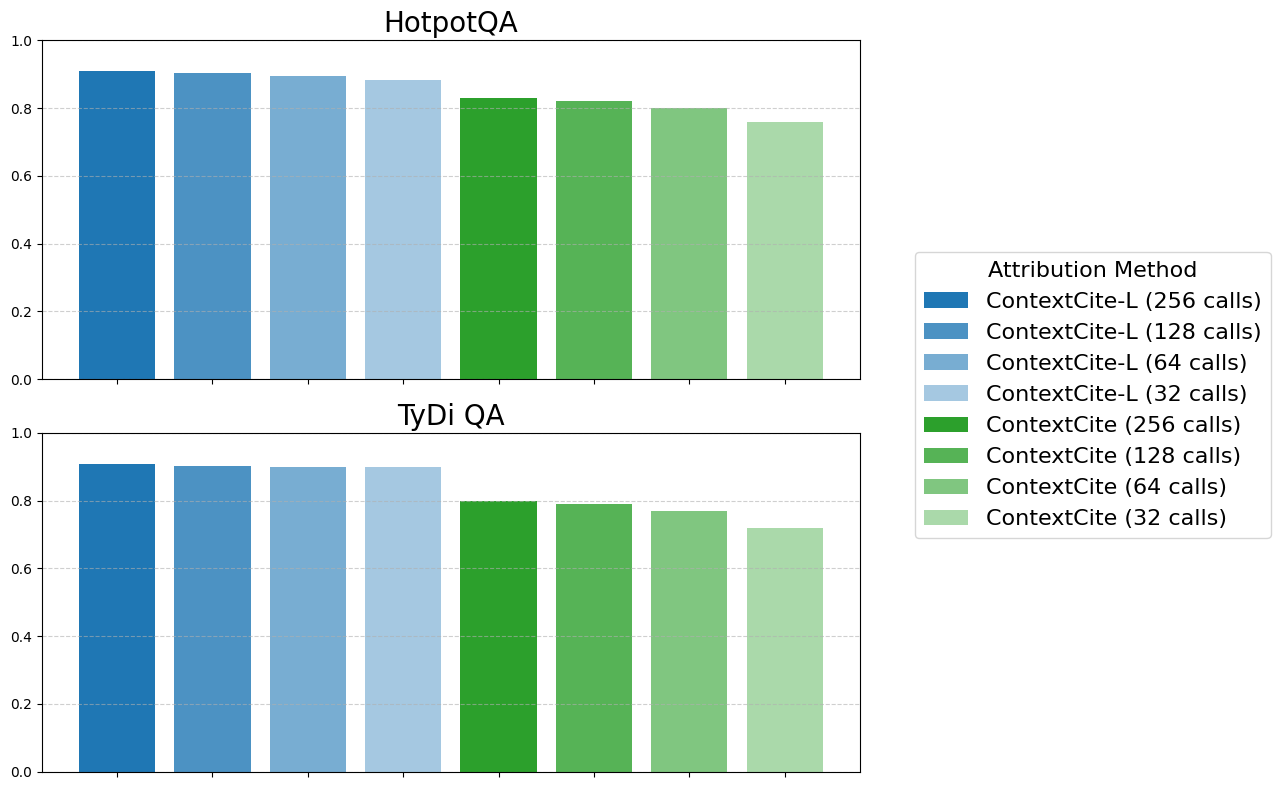

In [6]:
all_methods = {**contextcite_l_lds, **contextcite_lds}
methods = list(all_methods.keys())

# Plot settings
bar_width = 0.06
x = np.arange(len(methods))

fig, axes = plt.subplots(nrows=2, figsize=(10, 8), sharex=True)

# Keep track of handles for legend
handles_dict = {}
for i, ax in enumerate(axes):
    values = [all_methods[method][i] for method in methods]
    for j, method in enumerate(methods):
        bar = ax.bar(x[j], values[j], color=colors[method], label=method)
        if method not in handles_dict:
            handles_dict[method] = bar[0]
    ax.set_ylim(0, 1.0)
    ax.set_title(datasets[i], fontsize=20)
    ax.grid(axis='y', linestyle='--', alpha=0.6)

axes[-1].set_xticks(x)
axes[-1].set_xticklabels([])
# axes[-1].set_xlabel("Attribution Method", fontsize=16)

# Add legend on the right with title
legend = fig.legend(
    handles=list(handles_dict.values()),
    labels=list(handles_dict.keys()),
    title="Attribution Method",
    loc='center left',
    bbox_to_anchor=(0.92, 0.5),
    fontsize=16,
    title_fontsize=16,
    borderaxespad=0.0
)

plt.tight_layout(rect=[0, 0, 0.88, 1])

In [5]:
output_path = "results/plots/llama3_lds_cc.png"
fig.savefig(output_path, bbox_inches='tight', dpi=300)